
#### Author of Jupyter Notebook : Monika Avila Marquez 

#### References:
1. https://cran.r-project.org/web/packages/plm/vignettes/B_plmFunction.html
2. Croissant, Y., & Millo, G. (2019). Panel data econometrics with R. Wiley.
3. Dynamic Panel Data Models of Badi Baltagi, Econometric Analysis of Panel Data, 5th.
4. Installing jupyter notebook r kernel: https://datascience.stackexchange.com/questions/77335/anconda-r-version-how-to-upgrade-to-4-0-and-later

(All possible mistakes are my responsability and encourage you to email me in case you find any)

In [5]:
#Note: be sure you have R 4.0.0 minimum.

R.version


               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          0.0                         
year           2020                        
month          04                          
day            24                          
svn rev        78286                       
language       R                           
version.string R version 4.0.0 (2020-04-24)
nickname       Arbor Day                   

### LINEAR DYNAMIC PANEL DATA MODELS

In this Jupyter Notebook, I provide the implementation of:

1. Example 8.8 of Chapter8 Dynamic Panel Data Models of Badi Baltagi, Econometric Analysis of Panel Data, 5th. 


#### 1. Example 8.8 of Chapter8 Dynamic Panel Data Models of Badi Baltagi, Econometric Analysis of Panel Data, 5th. 

Goals:

1. Estimation of the Dynamic Demand of Cigarettes  

Baltagi and Levin (1992) considers the dynamic demand of cigarettes: 

$$lnC_{it}=\alpha+\beta_1lnC_{it-1}+\beta_2lnP_{it}+\beta_3lnY_{it}+\beta_4lnPn_{it}+\nu_i+\lambda_t+\epsilon_{it};$$

where: 

$C_{it}$: real pee capita sales by person of smoking age (>13 years old) of state $i$ in period $t$. This is the number of packs of cigarettes per head. 

$P_{it}$: average retail real price of a pack of cigarettes of state $i$ in period $t$.

$Y_{it}$: real per capita disposable income of state $i$ in period $t$.

$Pn_{it}$: minimum real price of cigarettes in any neighboring state for state $i$ in period $t$.

$\nu_i$: the state specific effect. 

$\lambda_t$:the time specific effect. These effects controle different policy interventions and health warnings that ocurred in USA. 

$\epsilon_{it}$: disturbance term;

The panel is balanced and is composed of 46 states observed over 30 years for the period 1963-1992. 

We aim to estimate this model using Pooled, FE specification, GMM: AH, AB, BB. 




In [8]:
install.packages('AER')
install.packages('plm')
install.packages('stargazer')
#install.packages('screenreg')
install.packages('panelvar')

Warning message:
"package 'AER' is in use and will not be installed"
Warning message:
"package 'plm' is in use and will not be installed"
Warning message:
"package 'stargazer' is in use and will not be installed"
Warning message:
"package 'panelvar' is in use and will not be installed"


In [9]:
library(AER)
library(plm)
library(stargazer)
#library(screenreg)
library(panelvar)

In [10]:
# 1.1. Upload data  
data("Cigar", package = "panelvar")
head(Cigar)

,state,year,price,pop,pop16,cpi,ndi,sales,pimin,log_price,log_pop,log_pop16,log_cpi,log_ndi,log_sales,log_pimin
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,63,28.6,3383,2236.5,30.6,1558.305,93.9,26.1,3.353407,8.126518,7.712667,3.421000,7.351354,4.542230,3.261935
2,1,64,29.8,3431,2276.7,31.0,1684.073,95.4,27.5,3.394508,8.140607,7.730482,3.433987,7.428971,4.558079,3.314186
3,1,65,29.8,3486,2327.5,31.5,1809.842,98.5,28.9,3.394508,8.156510,7.752550,3.449988,7.500995,4.590057,3.363842
4,1,66,31.5,3524,2369.7,32.4,1915.160,96.4,29.5,3.449988,8.167352,7.770519,3.478158,7.557557,4.568506,3.384390
5,1,67,31.6,3533,2393.7,33.4,2023.546,95.5,29.6,3.453157,8.169903,7.780596,3.508556,7.612607,4.559126,3.387774
6,1,68,35.6,3522,2405.2,34.8,2202.486,88.4,32.0,3.572346,8.166784,7.785388,3.549617,7.697342,4.481872,3.465736


In [11]:
# 1.1. Data exploration
# 1.1.1 Size or amount of data
summary(Cigar)
nrow(Cigar)
# 1.1.2 Completeness of the data
NROW(na.omit(Cigar))
# 1.1.3 Correctness of the data
#We do not have much info about this so we can 
#assume data is correct and no measurement error on the variables


     state            year          price             pop       
 Min.   : 1.00   Min.   :63.0   Min.   : 23.40   Min.   :  319  
 1st Qu.:15.00   1st Qu.:70.0   1st Qu.: 34.77   1st Qu.: 1053  
 Median :26.50   Median :77.5   Median : 52.30   Median : 3174  
 Mean   :26.83   Mean   :77.5   Mean   : 68.70   Mean   : 4537  
 3rd Qu.:40.00   3rd Qu.:85.0   3rd Qu.: 98.10   3rd Qu.: 5280  
 Max.   :51.00   Max.   :92.0   Max.   :201.90   Max.   :30703  
     pop16              cpi             ndi            sales      
 Min.   :  215.2   Min.   : 30.6   Min.   : 1323   Min.   : 53.4  
 1st Qu.:  781.2   1st Qu.: 38.8   1st Qu.: 3328   1st Qu.:107.9  
 Median : 2315.3   Median : 62.9   Median : 6281   Median :121.2  
 Mean   : 3366.6   Mean   : 73.6   Mean   : 7525   Mean   :124.0  
 3rd Qu.: 3914.3   3rd Qu.:107.6   3rd Qu.:11024   3rd Qu.:133.2  
 Max.   :22920.0   Max.   :140.3   Max.   :23074   Max.   :297.9  
     pimin          log_price        log_pop         log_pop16     
 Min.   

[1] 1380

[1] 1380

In [12]:
N=10
T=20

Warning message in plot.window(...):
""reg.line" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in axis(side = side, at = at, labels = labels, ...):
""reg.line" is not a graphical parameter"
Warning message in box(...):
""reg.line" is not a graphical parameter"
Warning message in title(...):
""reg.line" is not a graphical parameter"
Warning message in scatterplot.default(X[, 2], X[, 1], groups = X[, 3], xlab = xlab, :
"number of groups exceeds number of available colors
  colors are recycled"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '26'"
Warning message in plot.x

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '28'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
"unimplemented pch value '31'"
Warning message in plot.xy(xy.coords(x, y), type = type, ...

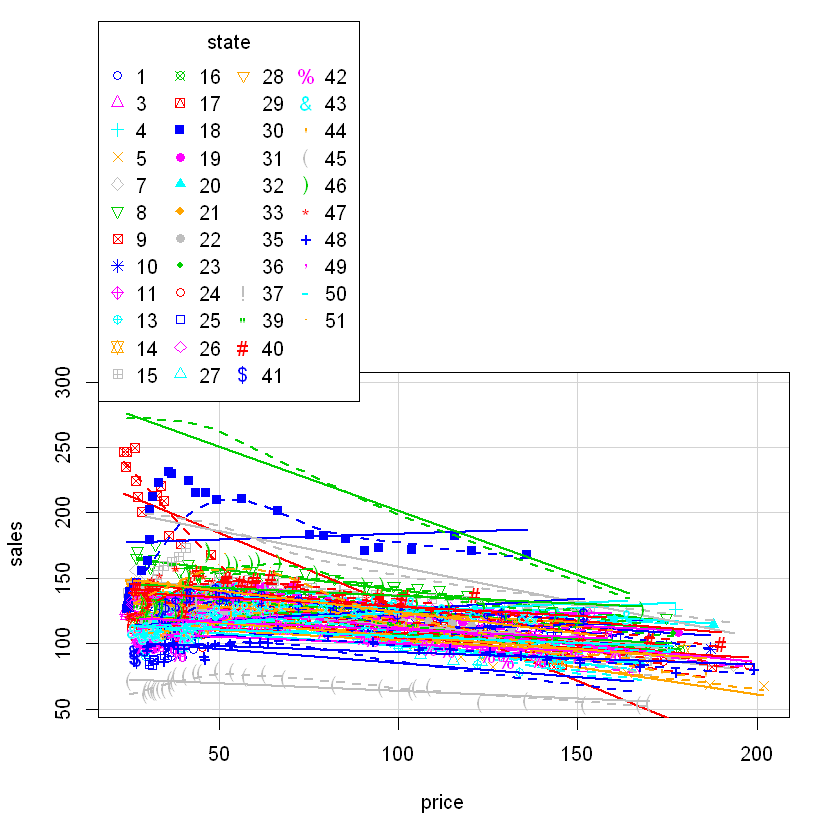

In [13]:
# 1.1.4 Graphical analysis 
scatterplot(sales~price|state, boxplots=FALSE, smooth=TRUE, reg.line=FALSE, data=Cigar)


In [31]:
# 1.2. Data modeling
# 1.2.1 Naive pooled OLS
ols <-plm(log_sales ~ lag(log_sales)+log_price + log_ndi  +log_pimin - 1 , Cigar,index = c("state", "year"),model = "pooling")
summary(ols)

Pooling Model

Call:
plm(formula = log_sales ~ lag(log_sales) + log_price + log_ndi + 
    log_pimin - 1, data = Cigar, model = "pooling", index = c("state", 
    "year"))

Balanced Panel: n = 46, T = 29, N = 1334

Residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.201062 -0.019394  0.001716  0.000277  0.024287  0.197012 

Coefficients:
                 Estimate Std. Error  t-value  Pr(>|t|)    
lag(log_sales)  0.9818144  0.0052864 185.7235 < 2.2e-16 ***
log_price      -0.0985202  0.0148099  -6.6523 4.204e-11 ***
log_ndi         0.0406165  0.0063632   6.3831 2.392e-10 ***
log_pimin       0.0315411  0.0123187   2.5604   0.01056 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    67.083
Residual Sum of Squares: 2.2968
R-Squared:      0.96645
Adj. R-Squared: 0.96637
F-statistic: 4444930 on 4 and 1330 DF, p-value: < 2.22e-16


Problems? 

OLS is incosistent and overestimates the true persistent parameter in an AR(1) model without covariates. When covariates are present, OLS is inconsistent. 

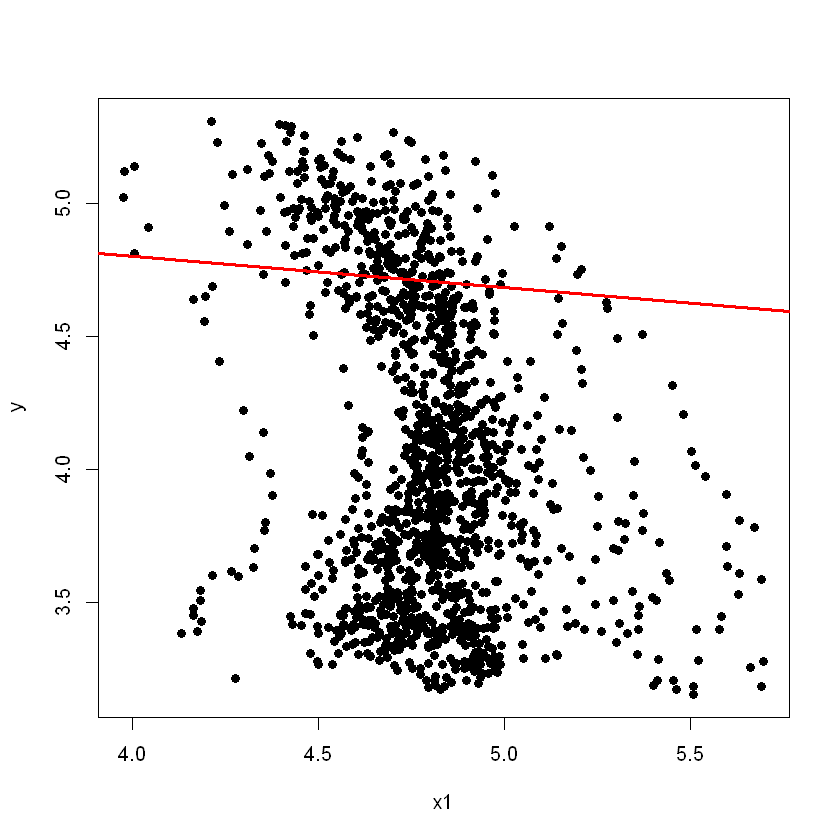

In [21]:

yhat <- ols$fitted
plot(Cigar$log_sales, Cigar$log_price, pch=19, xlab="x1", ylab="y")
abline(lm(Cigar$log_sales~Cigar$log_price),lwd=3, col="red")

We can see that the fitting of a linear pooling the data might not be the best. 

In [22]:
# 1.2.2 2 Way Random Effects Model 
re <- plm(log_sales ~ lag(log_sales)+log_price + log_pimin+log_ndi, Cigar, model = "random", effect = "twoways", 
           random.method = "walhus", random.dfcor = 3)
res <- update(re, random.method = "swar")
rea <- update(re, random.method = "amemiya")

summary(re)

Twoways effects Random Effect Model 
   (Wallace-Hussain's transformation)

Call:
plm(formula = log_sales ~ lag(log_sales) + log_price + log_pimin + 
    log_ndi, data = Cigar, effect = "twoways", model = "random", 
    random.method = "walhus", random.dfcor = 3)

Balanced Panel: n = 46, T = 29, N = 1334

Effects:
                    var   std.dev share
idiosyncratic 1.337e-03 3.656e-02 0.787
individual    8.522e-05 9.231e-03 0.050
time          2.771e-04 1.665e-02 0.163
theta: 0.4075 (id) 0.6919 (time) 0.3836 (total)

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.1938375 -0.0169733  0.0021969  0.0182060  0.2140031 

Coefficients:
                 Estimate Std. Error  z-value  Pr(>|z|)    
(Intercept)     0.3134730  0.0510376   6.1420 8.149e-10 ***
lag(log_sales)  0.9278692  0.0083236 111.4750 < 2.2e-16 ***
log_price      -0.1616994  0.0170957  -9.4585 < 2.2e-16 ***
log_pimin       0.0809467  0.0149749   5.4055 6.463e-08 ***
log_ndi         0.0413538  0.0101216 

GSLS estimation of the dynamic model still inconsitent. 


Within Estimation

In [32]:
# Within Estimation: Another option in R 
# (Reference for this section: https://www.econometrics-with-r.org/10-3-fixed-effects-regression.html)
# install and load the 'plm' package
wi <- plm(log_sales ~ lag(log_sales)+log_price + log_pimin+log_ndi, Cigar, model = "within", effect = "twoways")
# estimate the fixed effects regression with plm()

summary(wi)

Twoways effects Within Model

Call:
plm(formula = log_sales ~ lag(log_sales) + log_price + log_pimin + 
    log_ndi, data = Cigar, effect = "twoways", model = "within")

Balanced Panel: n = 46, T = 29, N = 1334

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-0.1838370 -0.0165617  0.0021857  0.0173721  0.2488126 

Coefficients:
                Estimate Std. Error  t-value  Pr(>|t|)    
lag(log_sales)  0.830251   0.012624  65.7668 < 2.2e-16 ***
log_price      -0.291682   0.023085 -12.6353 < 2.2e-16 ***
log_pimin       0.035456   0.026560   1.3349    0.1821    
log_ndi         0.106870   0.023342   4.5785 5.148e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Total Sum of Squares:    11.057
Residual Sum of Squares: 1.5428
R-Squared:      0.86047
Adj. R-Squared: 0.85191
F-statistic: 1936.37 on 4 and 1256 DF, p-value: < 2.22e-16

Within estimation of the dynamic model still inconsitent. 

In [41]:
# Anderson Hsiao 
ahsiao <- plm(diff(log_sales) ̃ diff(lag(log_sales)) +diff(log_price)+diff(log_pimin)+diff(log_ndi) - 1 |
lag(log_sales, 2) +diff(log_price)+diff(log_pimin)+diff(log_ndi) - 1,
Cigar, index = c("state", "year"),
model = "pooling" )
coef(summary(ahsiao))[1:2,]

,Estimate,Std. Error,z-value,Pr(>|z|)
diff(lag(log_sales)),0.1873245,0.16894414,1.108796,2.675184e-01
diff(log_price),-0.3688888,0.02511016,-14.690818,7.381685e-49


In [44]:
diff1 <- pgmm(log_sales ̃ lag(log_sales) + log_price+ log_pimin+log_ndi |
lag(log_sales, 2:99),
Cigar, index=c("state", "year"),
model="onestep", effect="twoways", subset = sample == 1)
coef(summary(diff1))

Warning message in pgmm(log_sales ~ lag(log_sales) + log_price + log_pimin + log_ndi | :
"the second-step matrix is singular, a general inverse is used"
Warning message in vcovHC.pgmm(object):
"a general inverse is used"


,Estimate,Std. Error,z-value,Pr(>|z|)
lag(log_sales),0.83252979,0.02845299,29.2598360,3.366337e-188
log_price,-0.37012836,0.04266215,-8.6758012,4.106490e-18
log_pimin,-0.02779783,0.05850464,-0.4751389,6.346879e-01
log_ndi,0.13432897,0.06117926,2.1956620,2.811614e-02
